## Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [6]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Understanding

### Intial Analysis

In [7]:
delivery_time.shape

(21, 2)

In [8]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

 # EDA AND DATA VISUALISATION

In [12]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

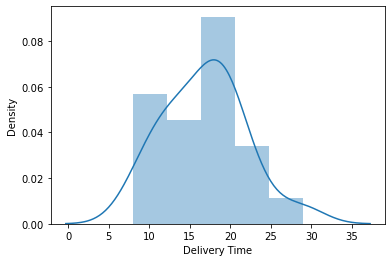

In [13]:
sns.distplot(delivery_time['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

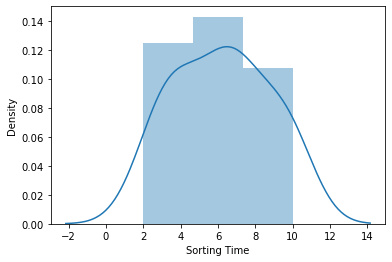

In [14]:
sns.distplot(delivery_time['Sorting Time'])

# Correlation analysis

In [15]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


## Assumption check

### 1. Linearity Check

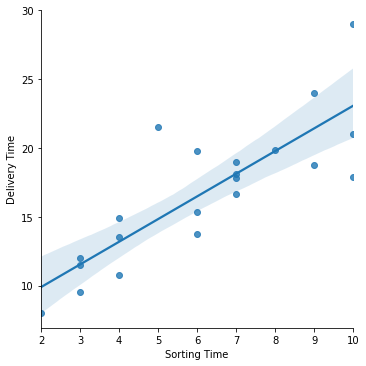

In [6]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_time)
plt.show()

### Normality Check

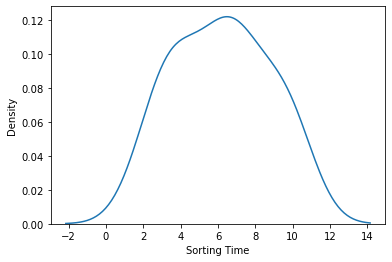

In [7]:
sns.distplot(a=delivery_time['Sorting Time'],hist=False)
plt.show()

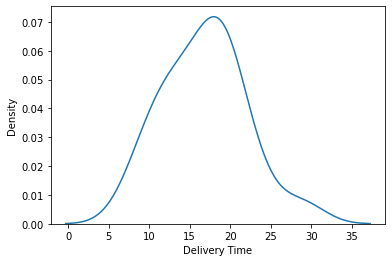

In [8]:
sns.distplot(a=delivery_time['Delivery Time'],hist=False)
plt.show()

In [9]:
delivery_time.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

## Model Building

In [20]:
import statsmodels.formula.api as smf

In [21]:
X=delivery_time[['Sorting Time']]
Y=delivery_time[['Delivery Time']]

In [22]:
X

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [23]:
Y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [25]:
Linear_model = smf.ols(formula='Y~X',data=delivery_time).fit()

In [28]:
Linear_model.params

Intercept    6.582734
X            1.649020
dtype: float64

In [29]:
# Finding tvalues and pvalues
Linear_model.tvalues , Linear_model.pvalues

(Intercept    3.823349
 X            6.387447
 dtype: float64,
 Intercept    0.001147
 X            0.000004
 dtype: float64)

The value of slope is 1.649

The value of intecept is 6.582

## Model Evaluation

In [31]:
y_pred = Linear_model.predict(X)

In [32]:
# Find Rsquared Values
Linear_model.rsquared , Linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(Y,y_pred))
print('r2 score is ',r2_score(Y,y_pred))

mean squared error is  7.793311548584062
r2 score is  0.6822714748417231


In [36]:
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        15:41:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Taking Log Transformation

In [37]:
log_x = np.log(delivery_time[['Sorting Time']])

In [39]:
frames = [log_x,Y]
log_model = pd.concat(frames,axis=1)
log_model

,Sorting Time,Delivery Time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


In [42]:
Linear_model_1 = smf.ols(formula='Y~log_x',data=log_model).fit()
Linear_model_1

In [71]:
Linear_model_1.params

Intercept    1.159684
log_x        9.043413
dtype: float64

In [72]:
Linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        15:44:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_x          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Prediction

In [44]:
y_pred_1 = Linear_model_1.predict(log_x)

In [47]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(Y,y_pred_1))
print('r2 score is ',r2_score(Y,y_pred_1))

mean squared error is  7.470226320948427
r2 score is  0.6954434611324223


### Taking Sqrt Transformation

In [48]:
sqrt_x = np.sqrt(delivery_time[['Sorting Time']])

In [50]:
frames = [sqrt_x,Y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,Sorting Time,Delivery Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [51]:
Linear_model_2 = smf.ols(formula='Y~sqrt_x',data=log_model).fit()
Linear_model_2

In [69]:
Linear_model_2.params

Intercept   -2.518837
sqrt_x       7.936591
dtype: float64

In [70]:
Linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.61e-06
Time:                        15:44:35   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_x         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
y_pred_2 = Linear_model_2.predict(sqrt_x)

In [55]:
print('mean squared error is ',mean_squared_error(Y,y_pred_2))
print('r2 score is ',r2_score(Y,y_pred_2))

mean squared error is  7.461328308595395
r2 score is  0.695806227630867


### Taking Square Transformation

In [56]:
square_x = np.sqrt(delivery_time[['Sorting Time']])

In [58]:
frames = [square_x,Y]
square_model = pd.concat(frames,axis=1)
square_model

,Sorting Time,Delivery Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [60]:
Linear_model_3 = smf.ols(formula='Y~sqrt_x',data=log_model).fit()
Linear_model_3

In [61]:
Linear_model_3.params

Intercept   -2.518837
sqrt_x       7.936591
dtype: float64

In [62]:
y_pred_3 = Linear_model_3.predict(sqrt_x)

In [66]:
print('mean squared error is ',mean_squared_error(Y,y_pred_3))
print('r2 score is ',r2_score(Y,y_pred_3))

mean squared error is  7.461328308595395
r2 score is  0.695806227630867


In [68]:
Linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.61e-06
Time:                        15:44:14   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_x         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation

From the above Models, original model is better model than the Transformed model